In [3]:
"Text DATA EXPLORATION ANALYSIS AND PRE-PROCESSING"

'Text DATA EXPLORATION ANALYSIS AND PRE-PROCESSING'

In [26]:
#importing libraries
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.download('stopwords') import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

SyntaxError: invalid syntax (2857671884.py, line 10)

In [16]:
#lOADING DATASET 
df = pd.read_csv("amazon_reviews_updated_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df.head()

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,1/1/2019,5,Dove MenÂs + Deodorant,"As you get older, you know what you like and w...",True
1,1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,1/2/2019,4,Vitamin B12.,Excellent,True
3,3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,1/2/2019,5,Very handy,Does what is says it does,False


In [18]:
#dropping unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2396 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


In [20]:
#Re-checking duplicates
dup = df.duplicated().sum()
print("Number of duplicate values in dataset: ", dup)

Number of duplicate values in dataset:  783


In [21]:
#removing duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


In [22]:
#re-checking null values
df.isnull().sum()

review_date           0
review_rating         0
review_title         68
review_text           0
verified_purchase     0
dtype: int64

In [23]:
#dropping review_title because of the null values
df.drop(["review_title","review_date"], axis=1, 
        inplace=True)
df.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


In [24]:
"Performing Exploratory Data Analysis on the REVIEW TEXT"

'Performing Exploratory Data Analysis on the REVIEW TEXT'

In [28]:
#Adding certain Columns to aid in our understanding
#Word Count
df['total words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#Character Count
df['total characters'] = df['review_text'].str.len() #spaces are included

#Stopwords Count
sw = set(stopwords.words('english'))
df['total stopwords'] = df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#Punctuation and Special Characters Count
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))

#Uppercase Character Counts
df['total uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len() 

In [29]:
#displaying updated dataframe
df.head()

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [30]:
#summary of the statistics
df.describe()

,review_rating,total words,total characters,total stopwords,total punctuations,total uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,177.890570,9.257276,4.434226,3.710128
std,1.123083,35.251879,189.818467,8.537092,5.177685,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,114.500000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


In [31]:
print(df.groupby("verified_purchase").describe())

                  review_rating                                               \
                          count      mean       std  min  25%  50%  75%  max   
verified_purchase                                                              
False                     900.0  4.315556  1.187805  1.0  4.0  5.0  5.0  5.0   
True                      818.0  4.580685  1.030249  1.0  5.0  5.0  5.0  5.0   

                  total words                                               \
                        count       mean        std  min   25%   50%   75%   
verified_purchase                                                            
False                   900.0  50.271111  36.854098  1.0  23.0  48.0  63.0   
True                    818.0  14.414425  21.041211  1.0   3.0   8.0  17.0   

                         total characters                                      \
                     max            count        mean         std  min    25%   
verified_purchase                             

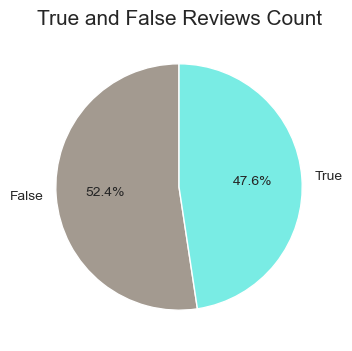

In [33]:
#Pie chart of verified purchases
colors = ['#A39A90','#79ECE4']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

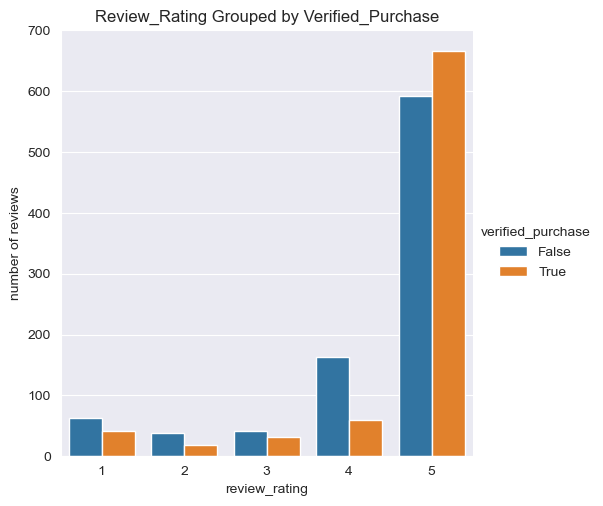

In [34]:
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase", data=df)
plt.xlabel("review_rating")
plt.ylabel("number of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

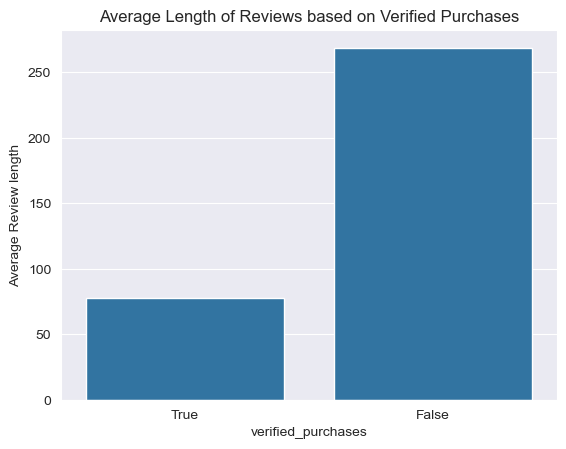

In [35]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#Filtering based on True and False VERIFIED PURCHASES
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

#Average review length based on True and False VERIFIED PURCHASES
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

#GRAPH
x = [true_average_length,false_average_length]
y = ["True", "False"]
sns.barplot(x=y, y=x)
plt.xlabel("verified_purchases")
plt.ylabel("Average Review length")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()


In [36]:
"Now starting PRE-PROCESSING"

'Now starting PRE-PROCESSING'

In [37]:
#Dropping Unnecessary Columns(all the ones added and review_rating)
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


In [38]:
"Text PRE-PROCESSING"

'Text PRE-PROCESSING'

In [43]:
#Cleaning and Standardizing the review_text

#Checking correct spelling
df.review_text.apply(lambda i: print(''.join(TextBlob(i).correct())))

Is you get older, you know what you like and what is suitable for your body. I like all Love products. Gives you that fresh all over, wide awake feeling and no dandruff or flakes skin. To smell a/pits!
Three gigantic marie wars that will last probably a whole life! That else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.
Excellent
A great flavour top - up for slow cooking.
Does what is says it does
Excellent item.Good for men
Thank you ofm very happy
Beautiful
Always buy. Fig bottles
Always use this product on my heavily mistreated hair and it works wonders time after time
Great value
tos not the one in the picture, but gets 5 stars because its the regular one I use and its awesome for people with dry skin.
Stem as described, excellent quality, rapid delivery Great for skin irritations, redness, blemishes
Good body wash but not a very strong smell
Great
North it!
I remember trying this at a friends house years ago. Now Ve been us

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
34      None
35      None
36      None
37      None
38      None
39      None
40      None
41      None
42      None
43      None
44      None
45      None
46      None
47      None
48      None
49      None
50      None
51      None
52      None
53      None
54      None
55      None
56      None
57      None
58      None
59      None
60      None
61      None
62      None
63      None
64      None
65      None
66      None
67      None
68      None
69      None
70      None
71      None
72      None
73      None
74      None
75      None
76      None

In [44]:
#a function to remove the stopwords, punctuations and others.
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()
    
    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []
    
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
            
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)

In [45]:
df['review_text'] = df['review_text'].apply(text_preprocessing)

In [46]:
df['review_text'].head()

0    get older know like suitabl bodi like dove pro...
1    three gigant marmit jar last probabl whole lif...
2                                                excel
3                          great flavour top slow cook
4                                                  say
Name: review_text, dtype: object

In [47]:
#checking for rare words
r = pd.Series(' '.join(df['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
Name: count, dtype: int64


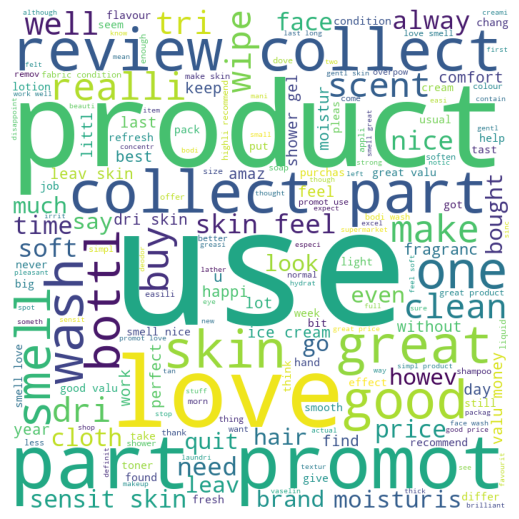

In [48]:
#checking for top common words
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

    
word_cloud = WordCloud(width = 700, height = 700, 
                       background_color ='white', 
                       min_font_size = 10).generate(words) 
plt.figure(figsize = (5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [49]:
#removing common and rare words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

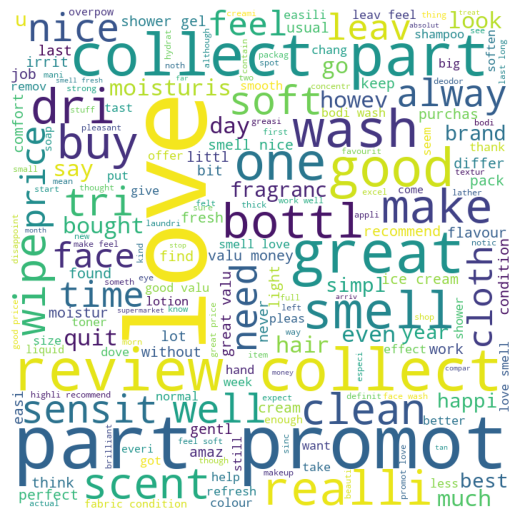

In [50]:
#Showing the updated wordcloud for the top words
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

    
word_cloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(words) 
plt.figure(figsize = (5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [53]:
df['review_text'].apply(word_tokenize).head()

0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [54]:
#saving the updated dataframe
df.to_csv('amazon_reviews_cleaned_data.csv')